In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

In [5]:
X = pd.DataFrame(X)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logreg = LogisticRegression()

In [10]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [11]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,y_pred)
print(acc)

0.8466666666666667


## Hyperparameter Tuning and Cross Validation

In [12]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [13]:
param = dict(penalty=penalty,C=c_values,solver=solver)

In [14]:
## GridSearch CV
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv = StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=cv)

In [15]:
grid.fit(X_train,Y_train)

/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [16]:
grid.best_estimator_

LogisticRegression(C=0.01, solver='newton-cg')

In [17]:
grid.best_score_

0.8785714285714287

In [18]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

## Randomized Search CV

In [19]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
cv = StratifiedKFold()
randomSearch = RandomizedSearchCV(estimator=model,param_distributions=param,scoring='accuracy',cv=cv)
randomSearch.fit(X_train,Y_train)


/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [20]:
randomSearch.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 10}

## Logistic Regression for  Multiclass Classification

In [21]:
X,y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=15)

In [22]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_Train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class="ovr")
logreg.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr')

In [25]:
y_pred = logreg.predict(X_test)

In [26]:
score = accuracy_score(y_pred,Y_test)
print(score)

0.37


## Logistic Regression on Imbalanced Dataset

In [27]:
from collections import Counter
from sklearn.datasets import make_classification

In [28]:
X,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [29]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [30]:
Counter(y)

Counter({0: 9846, 1: 154})

In [31]:
import seaborn as sns

<Axes: xlabel='Feature1', ylabel='Feature2'>

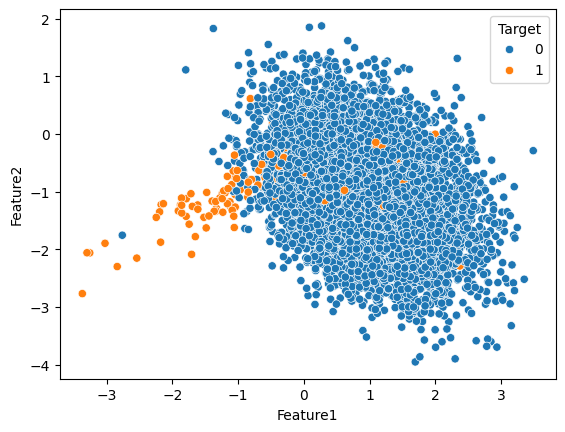

In [32]:
import pandas as pd
import seaborn as sns

# Assuming X is a 2D array-like object and y is a 1D array-like object
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Create the scatter plot
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Target')


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weights = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [35]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weights)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [37]:
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [38]:
grid.fit(X_train,Y_train)

/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [39]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

## Logistic Regression With ROC curve and ROC AUC score

In [40]:
from sklearn.metrics import roc_curve,roc_auc_score

In [41]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [44]:
## generate a no skill prediction (majority class)
dummy_model_prob = [0 for _ in range(len(Y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [45]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [46]:
model_prob = model.predict_proba(X_test)

In [47]:
model_prob = model_prob[:,1]

In [48]:
dummy_model_auc = roc_auc_score(Y_test,dummy_model_prob)
model_auc = roc_auc_score(Y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [51]:
dummy_fpr,dummy_tpr,_ = roc_curve(Y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds = roc_curve(Y_test,model_prob)

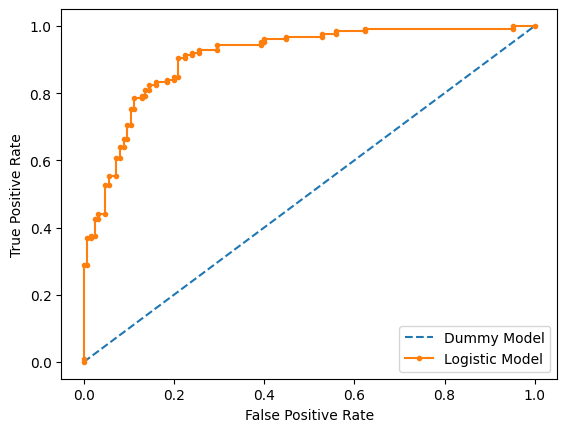

In [52]:
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [53]:
thresholds

array([           inf, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

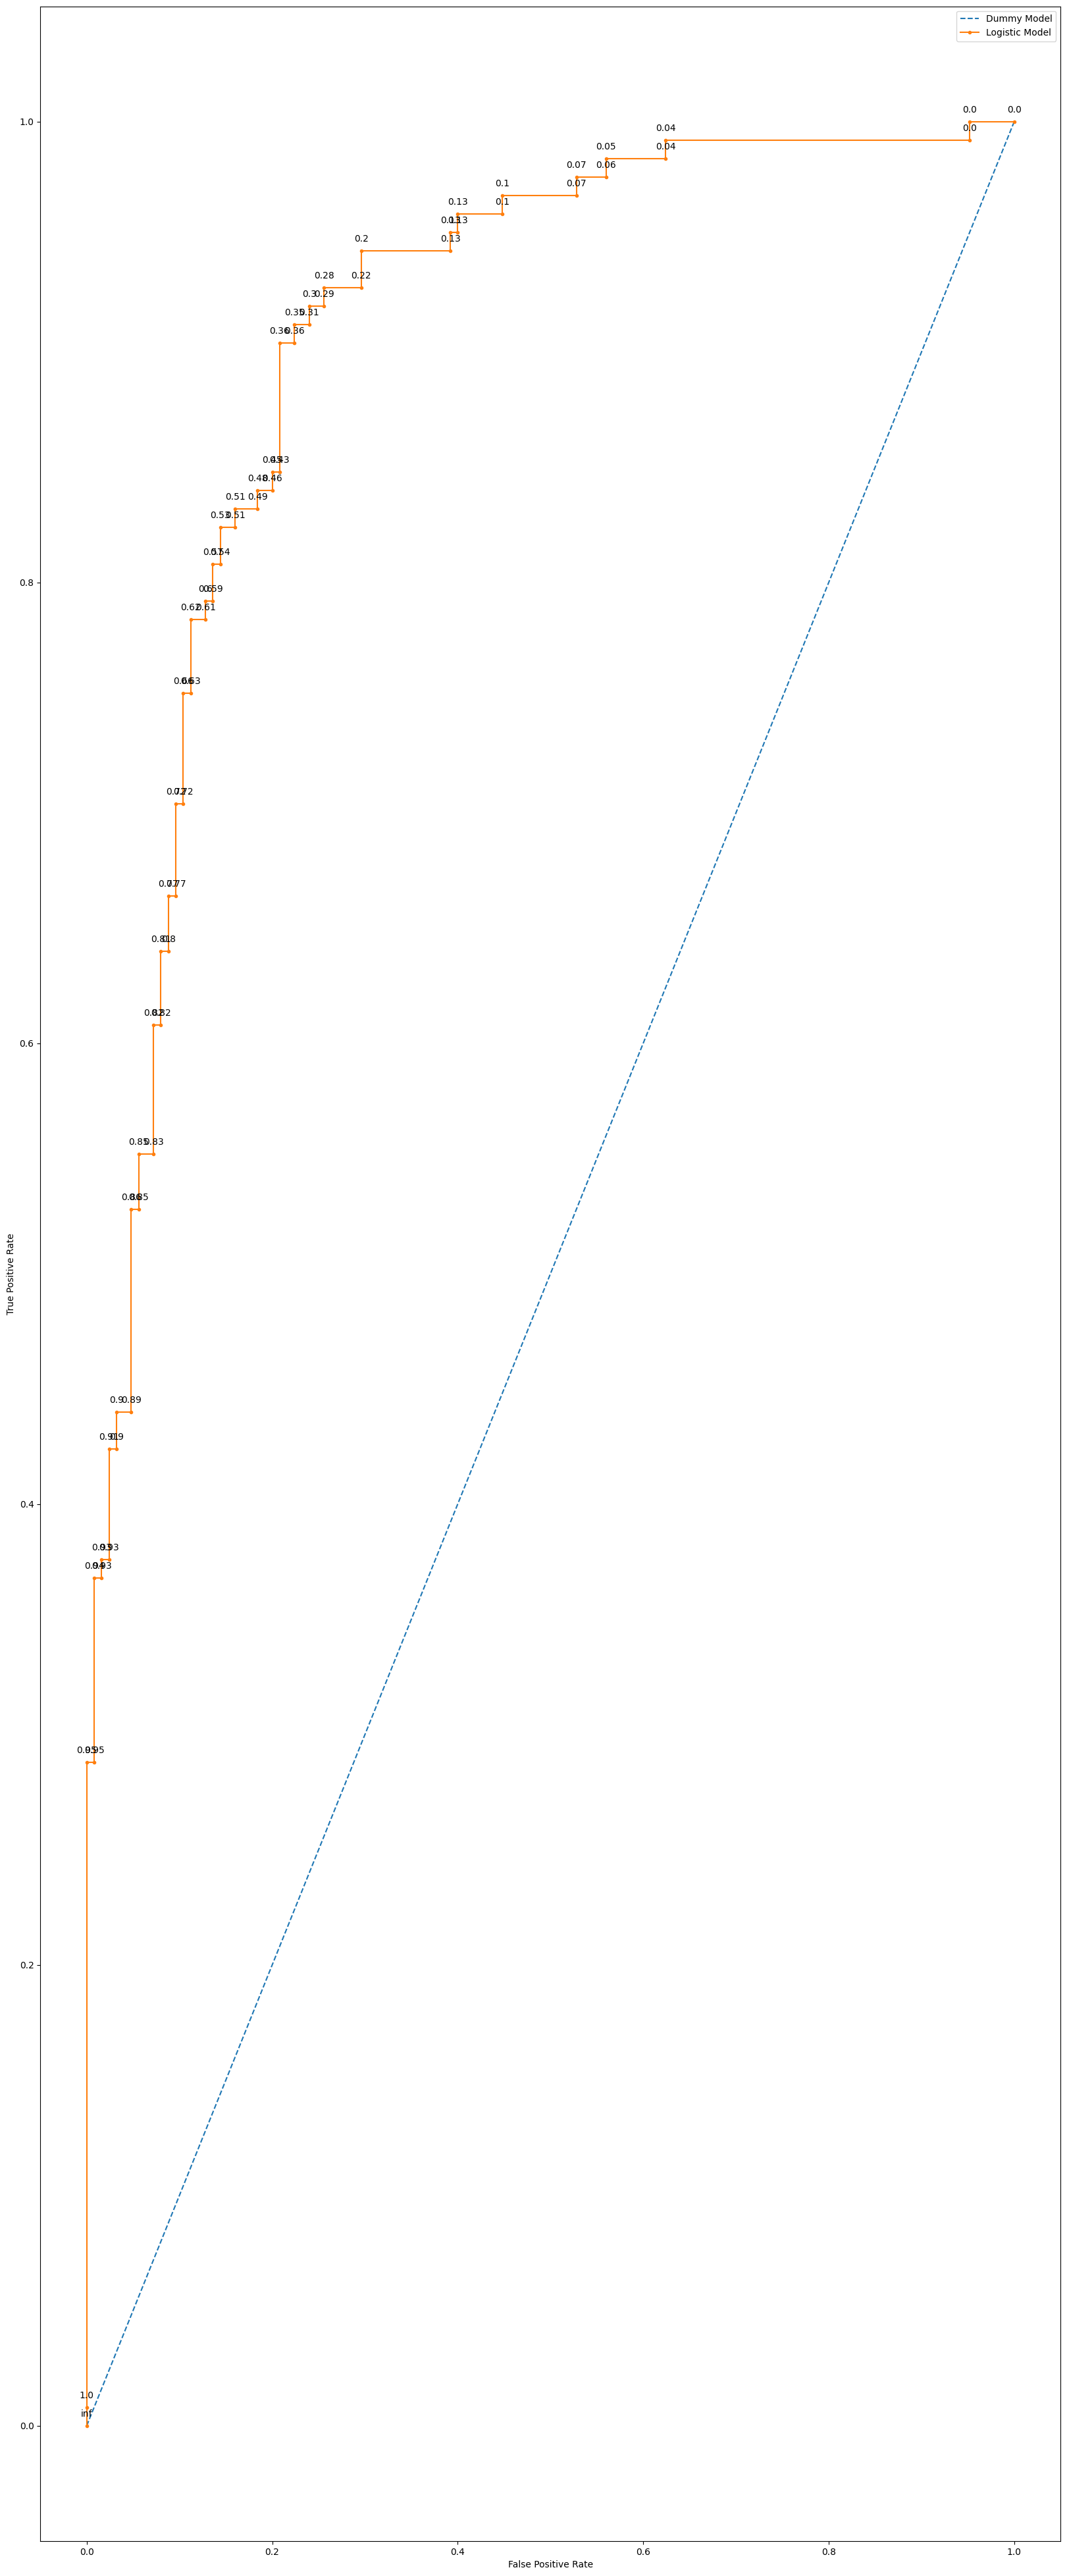

In [58]:
import numpy as np
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')

# Add annotations for each threshold value
for xyz in zip(model_fpr, model_tpr, thresholds):
    plt.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

# Show the plot
plt.show()
